## Aluno: Lucas Barbosa dos Santos

##Atividade

Utilizando como base o código 3.2-LogisticRegressionMNIST.ipynb,
faça as 2 atividades abaixo. Para submissão, submeta sua resposta no
repositório criado para a disciplina.

Coloque o resultado dentro de uma pasta chamada "Atividade Aula 3.2".


1)
Insira código no laço do treinamento para que no final de cada época,
seja impresso: o número da época e a perda e a acurácia.

2)
Insira código no laço do treinamento para visualização dos valores dos
gradientes referentes à classe do dígito 4, no final de cada época.

In [70]:
! pip install Pillow

In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

In [72]:
! git clone https://github.com/vcasadei/MNIST.git

fatal: destination path 'MNIST' already exists and is not an empty directory.


In [73]:
!ls MNIST

processed  raw


In [74]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


In [75]:
#Carregamento, normalização e seleção de dados
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

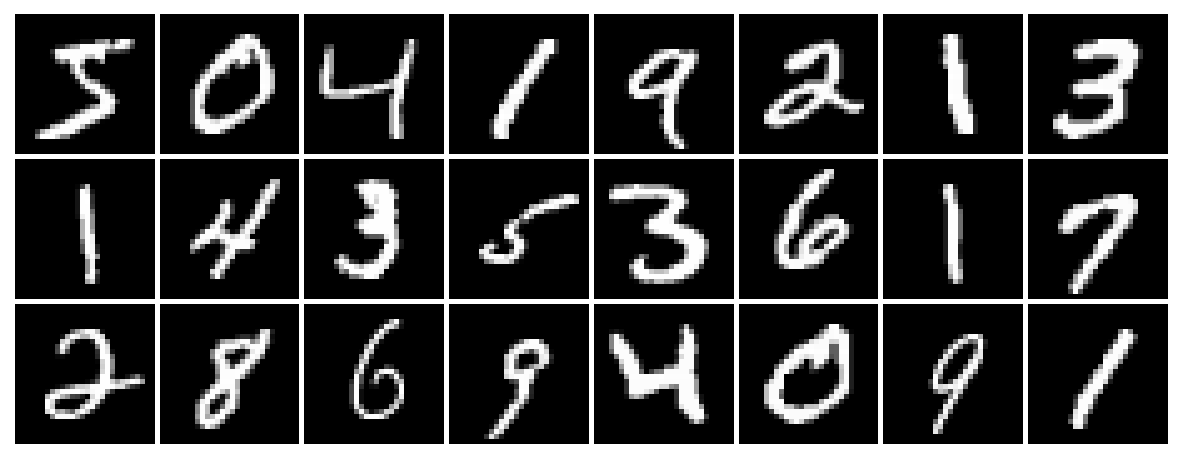

In [76]:
#Visualização dos dados
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

class: tensor(5)


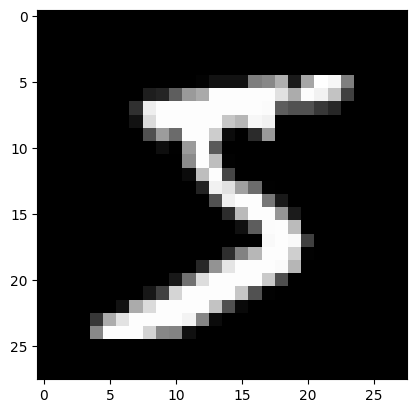

In [77]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

In [78]:
#Modelo
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

In [79]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[ 0.0069,  0.4304,  0.0135,  0.4560,  0.1355, -0.0456,  0.1527, -0.2887,
          0.0746,  0.1290],
        [ 0.1374,  0.0694, -0.0645,  0.0951,  0.0448,  0.1780,  0.3110, -0.2704,
          0.4084,  0.0616],
        [ 0.1356,  0.4325,  0.0717,  0.0656, -0.0748, -0.0075, -0.0403, -0.2490,
          0.0589,  0.1125],
        [ 0.1569,  0.3716,  0.0839,  0.1157,  0.0755, -0.0062, -0.1134, -0.0390,
          0.0023,  0.2405],
        [ 0.0033,  0.2548, -0.1794,  0.0559,  0.1402,  0.0806,  0.1937,  0.1428,
          0.2679, -0.0653]], grad_fn=<AddmmBackward0>)

In [80]:
#Treinamento
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [81]:
# Visualização do grafo computacional da perda (loss)
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-4ohgnj3h
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-4ohgnj3h
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Preparing metadata (setup.py) ... done


In [82]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss

tensor(2.3084, grad_fn=<NllLossBackward0>)

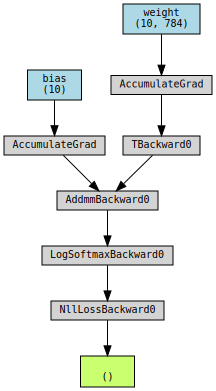

In [83]:
p = make_dot(loss, dict(model.named_parameters()))
p

In [84]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

In [85]:
print('Final loss:', loss.item())

Final loss: 0.2652530372142792


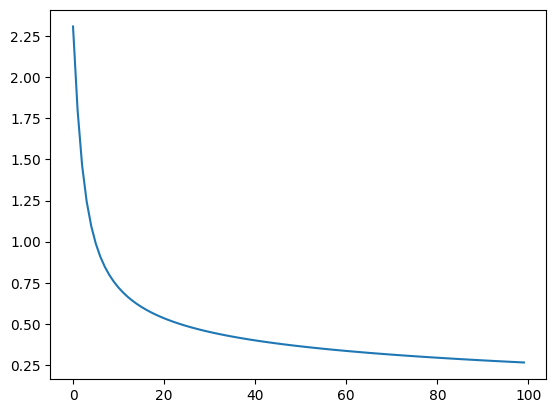

In [86]:
plt.plot(losses)

In [87]:
#Avaliação
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.945


In [88]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,110,1,0,0,0,2,2,1,0
2,0,1,91,1,0,1,1,1,1,1
3,0,0,0,88,0,2,0,0,0,0
4,0,0,1,0,102,2,0,1,0,3
5,0,2,0,1,0,83,0,0,1,1
6,1,0,1,1,2,2,90,0,1,0
7,0,1,1,1,0,0,0,112,0,3
8,0,2,2,0,0,0,0,0,83,0


weights: torch.Size([10, 784])
bias:    torch.Size([10])


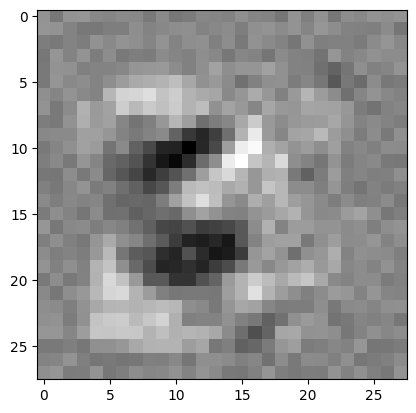

In [89]:
#Visualizando a Matriz de pesos treinados
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

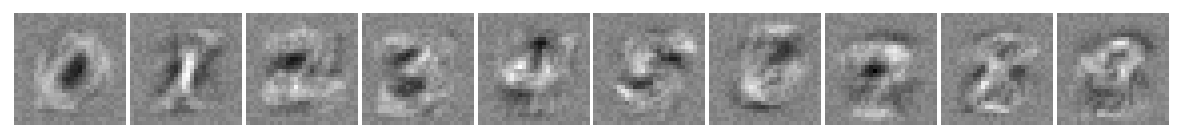

In [90]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

Época [1/100]: perda de 0.263921 | acurácia de 0.945
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época [2/100]: perda de 0.262605 | acurácia de 0.945
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época [3/100]: perda de 0.261304 | acurácia de 0.945
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época [4/100]: perda de 0.260018 | acurácia de 0.945
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época [5/100]: perda de 0.258747 | acurácia de 0.945
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época [6/100]: perda de 0.257491 | acurácia de 0.946
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época [7/100]: perda de 0.256249 | acurácia de 0.946
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época [8/100]: perda de 0.255020 | acurácia de 0.946
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época [9/100]: perda de 0.253806 | acurácia de 0.946
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época [10/

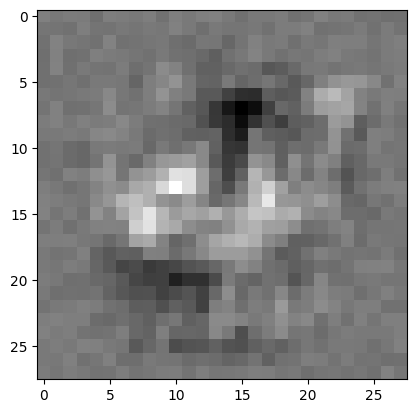

In [91]:
#1
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    print(f"Época [{i+1}/{epochs}]: perda de {loss:.6f} | acurácia de {accuracy}")

    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)


plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()